# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-08 16:33:13.317630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

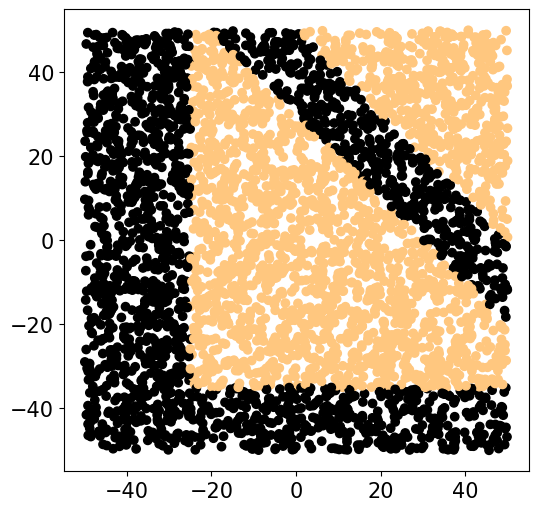

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow + Optimization method and cost function

In [14]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


def create_model(activation='relu',optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [20]:
model_DNN = create_model()

print(model_DNN.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 20)                60        
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable 

### Training

In [21]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6062 - accuracy: 0.6706 - val_loss: 0.5103 - val_accuracy: 0.7425 - 939ms/epoch - 15ms/step
Epoch 2/400
64/64 - 0s - loss: 0.4938 - accuracy: 0.7509 - val_loss: 0.4786 - val_accuracy: 0.7675 - 338ms/epoch - 5ms/step
Epoch 3/400
64/64 - 0s - loss: 0.4760 - accuracy: 0.7594 - val_loss: 0.4736 - val_accuracy: 0.7625 - 415ms/epoch - 6ms/step
Epoch 4/400
64/64 - 0s - loss: 0.4685 - accuracy: 0.7600 - val_loss: 0.4686 - val_accuracy: 0.7650 - 328ms/epoch - 5ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4624 - accuracy: 0.7622 - val_loss: 0.4587 - val_accuracy: 0.7688 - 319ms/epoch - 5ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4570 - accuracy: 0.7638 - val_loss: 0.4551 - val_accuracy: 0.7675 - 283ms/epoch - 4ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4509 - accuracy: 0.7644 - val_loss: 0.4482 - val_accuracy: 0.7750 - 249ms/epoch - 4ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4491 - accuracy: 0.7638 - val_loss: 0.4557 - val_accuracy: 0.7650 - 297ms/epoch - 5ms/step
Epoch 9

Epoch 67/400
64/64 - 0s - loss: 0.2277 - accuracy: 0.8916 - val_loss: 0.2256 - val_accuracy: 0.8913 - 276ms/epoch - 4ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2231 - accuracy: 0.8922 - val_loss: 0.2199 - val_accuracy: 0.8900 - 293ms/epoch - 5ms/step
Epoch 69/400
64/64 - 0s - loss: 0.2240 - accuracy: 0.8913 - val_loss: 0.2238 - val_accuracy: 0.8863 - 287ms/epoch - 4ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2193 - accuracy: 0.8928 - val_loss: 0.2227 - val_accuracy: 0.8888 - 271ms/epoch - 4ms/step
Epoch 71/400
64/64 - 0s - loss: 0.2181 - accuracy: 0.8913 - val_loss: 0.2171 - val_accuracy: 0.8938 - 263ms/epoch - 4ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2172 - accuracy: 0.8966 - val_loss: 0.2148 - val_accuracy: 0.8963 - 255ms/epoch - 4ms/step
Epoch 73/400
64/64 - 0s - loss: 0.2148 - accuracy: 0.8969 - val_loss: 0.2216 - val_accuracy: 0.8838 - 281ms/epoch - 4ms/step
Epoch 74/400
64/64 - 0s - loss: 0.2145 - accuracy: 0.8972 - val_loss: 0.2150 - val_accuracy: 0.8975 - 250ms/epoch - 4ms/step


Epoch 133/400
64/64 - 0s - loss: 0.1684 - accuracy: 0.9181 - val_loss: 0.1620 - val_accuracy: 0.9225 - 262ms/epoch - 4ms/step
Epoch 134/400
64/64 - 0s - loss: 0.1702 - accuracy: 0.9191 - val_loss: 0.1656 - val_accuracy: 0.9237 - 289ms/epoch - 5ms/step
Epoch 135/400
64/64 - 0s - loss: 0.1845 - accuracy: 0.9175 - val_loss: 0.2081 - val_accuracy: 0.9075 - 315ms/epoch - 5ms/step
Epoch 136/400
64/64 - 0s - loss: 0.1741 - accuracy: 0.9166 - val_loss: 0.1562 - val_accuracy: 0.9300 - 271ms/epoch - 4ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1743 - accuracy: 0.9147 - val_loss: 0.1859 - val_accuracy: 0.9162 - 254ms/epoch - 4ms/step
Epoch 138/400
64/64 - 0s - loss: 0.1694 - accuracy: 0.9212 - val_loss: 0.1563 - val_accuracy: 0.9312 - 273ms/epoch - 4ms/step
Epoch 139/400
64/64 - 0s - loss: 0.1660 - accuracy: 0.9200 - val_loss: 0.1546 - val_accuracy: 0.9312 - 206ms/epoch - 3ms/step
Epoch 140/400
64/64 - 0s - loss: 0.1636 - accuracy: 0.9237 - val_loss: 0.1553 - val_accuracy: 0.9275 - 229ms/epoch - 4

64/64 - 0s - loss: 0.1222 - accuracy: 0.9534 - val_loss: 0.1254 - val_accuracy: 0.9638 - 237ms/epoch - 4ms/step
Epoch 199/400
64/64 - 0s - loss: 0.1154 - accuracy: 0.9563 - val_loss: 0.1001 - val_accuracy: 0.9725 - 268ms/epoch - 4ms/step
Epoch 200/400
64/64 - 0s - loss: 0.1133 - accuracy: 0.9534 - val_loss: 0.1048 - val_accuracy: 0.9663 - 318ms/epoch - 5ms/step
Epoch 201/400
64/64 - 0s - loss: 0.1199 - accuracy: 0.9525 - val_loss: 0.1072 - val_accuracy: 0.9663 - 324ms/epoch - 5ms/step
Epoch 202/400
64/64 - 0s - loss: 0.1153 - accuracy: 0.9503 - val_loss: 0.1028 - val_accuracy: 0.9663 - 254ms/epoch - 4ms/step
Epoch 203/400
64/64 - 0s - loss: 0.1100 - accuracy: 0.9588 - val_loss: 0.1016 - val_accuracy: 0.9663 - 310ms/epoch - 5ms/step
Epoch 204/400
64/64 - 0s - loss: 0.1118 - accuracy: 0.9534 - val_loss: 0.1024 - val_accuracy: 0.9688 - 309ms/epoch - 5ms/step
Epoch 205/400
64/64 - 0s - loss: 0.1121 - accuracy: 0.9538 - val_loss: 0.0962 - val_accuracy: 0.9712 - 218ms/epoch - 3ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.0820 - accuracy: 0.9741 - val_loss: 0.0600 - val_accuracy: 0.9837 - 299ms/epoch - 5ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0775 - accuracy: 0.9719 - val_loss: 0.0592 - val_accuracy: 0.9862 - 278ms/epoch - 4ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0726 - accuracy: 0.9756 - val_loss: 0.0553 - val_accuracy: 0.9900 - 220ms/epoch - 3ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0700 - accuracy: 0.9778 - val_loss: 0.0880 - val_accuracy: 0.9725 - 281ms/epoch - 4ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0831 - accuracy: 0.9731 - val_loss: 0.0563 - val_accuracy: 0.9812 - 266ms/epoch - 4ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0804 - accuracy: 0.9716 - val_loss: 0.1068 - val_accuracy: 0.9700 - 276ms/epoch - 4ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0745 - accuracy: 0.9750 - val_loss: 0.0795 - val_accuracy: 0.9737 - 283ms/epoch - 4ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0876 - accuracy: 0.9697 - val_loss: 0.0555 - val_accuracy: 0.9800 - 303ms/epoch - 5

64/64 - 0s - loss: 0.0471 - accuracy: 0.9844 - val_loss: 0.0333 - val_accuracy: 0.9912 - 263ms/epoch - 4ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0498 - accuracy: 0.9859 - val_loss: 0.0345 - val_accuracy: 0.9862 - 321ms/epoch - 5ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0326 - val_accuracy: 0.9887 - 244ms/epoch - 4ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0656 - accuracy: 0.9831 - val_loss: 0.0336 - val_accuracy: 0.9875 - 309ms/epoch - 5ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0354 - val_accuracy: 0.9887 - 290ms/epoch - 5ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0351 - val_accuracy: 0.9887 - 296ms/epoch - 5ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0418 - accuracy: 0.9884 - val_loss: 0.0315 - val_accuracy: 0.9900 - 293ms/epoch - 5ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0409 - val_accuracy: 0.9825 - 223ms/epoch - 3ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0389 - accuracy: 0.9856 - val_loss: 0.0356 - val_accuracy: 0.9887 - 221ms/epoch - 3ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0372 - accuracy: 0.9906 - val_loss: 0.0282 - val_accuracy: 0.9900 - 243ms/epoch - 4ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0300 - val_accuracy: 0.9900 - 251ms/epoch - 4ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.0422 - val_accuracy: 0.9837 - 286ms/epoch - 4ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0463 - accuracy: 0.9837 - val_loss: 0.0259 - val_accuracy: 0.9912 - 320ms/epoch - 5ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0341 - accuracy: 0.9869 - val_loss: 0.0333 - val_accuracy: 0.9850 - 276ms/epoch - 4ms/step


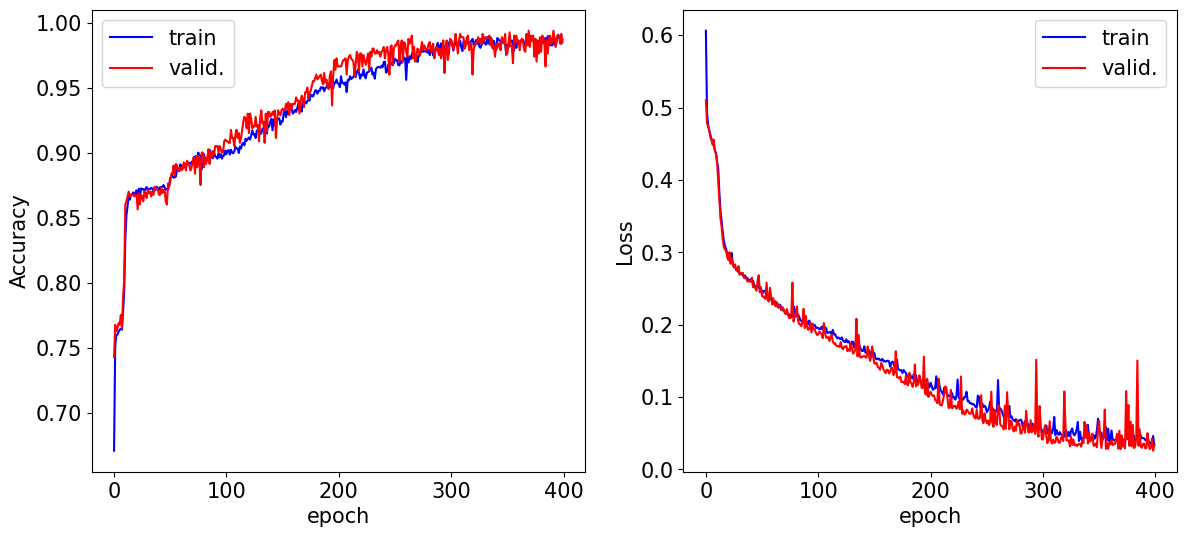

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_DNN.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 4ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

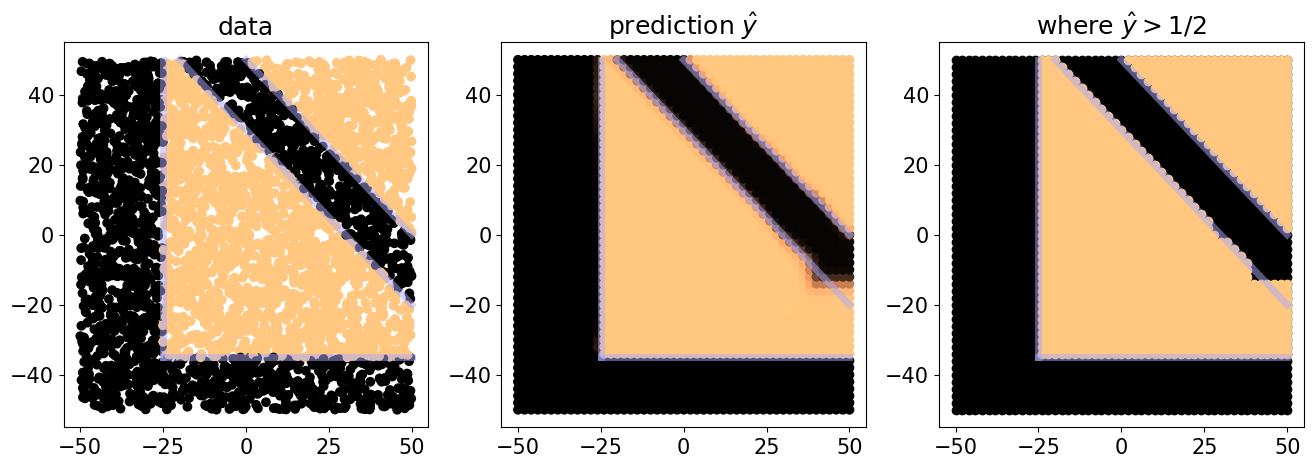

In [24]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Optimization

Grid search to find the best minimization algorithm:

In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
    
    
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result_opt = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result_opt.best_score_, grid_result_opt.best_params_))
means = grid_result_opt.cv_results_['mean_test_score']
stds = grid_result_opt.cv_results_['std_test_score']
params = grid_result_opt.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_7533/3660728859.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 1s 5ms/step - loss: 0.6427 - accuracy: 0.6375
Best: 0.682500 using {'optimizer': 'RMSprop'}
0.599688 (0.068911) with: {'optimizer': 'SGD'}
0.682500 (0.036196) with: {'optimizer': 'RMSprop'}
0.585000 (0.054708) with: {'optimizer': 'Adagrad'}
0.467500 (0.115603) with: {'optimizer': 'Adadelta'}
0.639063 (0.099044) with: {'optimizer': 'Adam'}
0.589688 (0.076671) with: {'optimizer': 'Adamax'}
0.623750 (0.060020) with: {'optimizer': 'Nadam'}


Grid search to find the best activation function:

In [26]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result_act = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result_act.best_score_, grid_result_act.best_params_))
means = grid_result_act.cv_results_['mean_test_score']
stds = grid_result_act.cv_results_['std_test_score']
params = grid_result_act.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_7533/3280631067.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 1s 5ms/step - loss: 0.6683 - accuracy: 0.5953
Best: 0.743460 using {'activation': 'relu'}
0.517495 (0.013583) with: {'activation': 'softmax'}
0.534052 (0.026974) with: {'activation': 'softplus'}
0.708757 (0.016865) with: {'activation': 'softsign'}
0.743460 (0.053512) with: {'activation': 'relu'}
0.672515 (0.033724) with: {'activation': 'tanh'}
0.517495 (0.013583) with: {'activation': 'sigmoid'}
0.517495 (0.013583) with: {'activation': 'hard_sigmoid'}
0.680952 (0.038196) with: {'activation': 'linear'}


## Exercise 2 - Best DNN 

After performing a grid search, we consider the best minimization algorithm and the best activation function and we train the model again.

In [27]:
#extract the best optimizer algorithm and activation unit from the previous grid search
opt = list(grid_result_opt.best_params_.values())
best_act = list(grid_result_act.best_params_.values())
best_act = best_act[0]

In [53]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
if opt[0]=='SGD':
    best_opt = keras.optimizers.SGD()
if opt[0]=='RMSprop':
    best_opt = keras.optimizers.RMSprop()
if opt[0]=='Adagrad':
    best_opt = keras.optimizers.Adagrad()
if opt[0]=='Adadelta':
    best_opt = keras.optimizers.Adadelta()
if opt[0]=='Adam':
    best_opt = keras.optimizers.Adam()
if opt[0]=='Adamax':
    best_opt = keras.optimizers.Adamax()
if opt[0]=='Nadam':
    best_opt = keras.optimizers.Nadam()

def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           #optimization method and cost function
                  metrics=['accuracy'])
    return model

In [54]:
best_model_DNN = create_model()
print(best_model_DNN.summary())

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 2)                 6         
                                                                 
 dense_301 (Dense)           (None, 20)                60        
                                                                 
 dense_302 (Dense)           (None, 20)                420       
                                                                 
 dense_303 (Dense)           (None, 20)                420       
                                                                 
 dropout_60 (Dropout)        (None, 20)                0         
                                                                 
 dense_304 (Dense)           (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable

In [55]:
fit = best_model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),    #fit with same amount of data
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.5925 - accuracy: 0.6878 - val_loss: 0.5097 - val_accuracy: 0.7475 - 1s/epoch - 17ms/step
Epoch 2/400
64/64 - 0s - loss: 0.4901 - accuracy: 0.7572 - val_loss: 0.4790 - val_accuracy: 0.7725 - 312ms/epoch - 5ms/step
Epoch 3/400
64/64 - 0s - loss: 0.4756 - accuracy: 0.7591 - val_loss: 0.4705 - val_accuracy: 0.7613 - 344ms/epoch - 5ms/step
Epoch 4/400
64/64 - 0s - loss: 0.4704 - accuracy: 0.7625 - val_loss: 0.4610 - val_accuracy: 0.7625 - 346ms/epoch - 5ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4651 - accuracy: 0.7628 - val_loss: 0.4526 - val_accuracy: 0.7688 - 324ms/epoch - 5ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4625 - accuracy: 0.7638 - val_loss: 0.4549 - val_accuracy: 0.7713 - 303ms/epoch - 5ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4567 - accuracy: 0.7638 - val_loss: 0.4498 - val_accuracy: 0.7713 - 344ms/epoch - 5ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4571 - accuracy: 0.7641 - val_loss: 0.4546 - val_accuracy: 0.7650 - 298ms/epoch - 5ms/step
Epoch 9/40

Epoch 67/400
64/64 - 0s - loss: 0.2165 - accuracy: 0.8891 - val_loss: 0.2021 - val_accuracy: 0.8913 - 241ms/epoch - 4ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2094 - accuracy: 0.8966 - val_loss: 0.2019 - val_accuracy: 0.8963 - 307ms/epoch - 5ms/step
Epoch 69/400
64/64 - 0s - loss: 0.2134 - accuracy: 0.8978 - val_loss: 0.2107 - val_accuracy: 0.8913 - 271ms/epoch - 4ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2110 - accuracy: 0.8950 - val_loss: 0.2110 - val_accuracy: 0.8913 - 294ms/epoch - 5ms/step
Epoch 71/400
64/64 - 0s - loss: 0.2092 - accuracy: 0.8959 - val_loss: 0.1946 - val_accuracy: 0.9013 - 266ms/epoch - 4ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2080 - accuracy: 0.8997 - val_loss: 0.1952 - val_accuracy: 0.9013 - 311ms/epoch - 5ms/step
Epoch 73/400
64/64 - 0s - loss: 0.2053 - accuracy: 0.8963 - val_loss: 0.2036 - val_accuracy: 0.8938 - 251ms/epoch - 4ms/step
Epoch 74/400
64/64 - 0s - loss: 0.2022 - accuracy: 0.8997 - val_loss: 0.2015 - val_accuracy: 0.8988 - 306ms/epoch - 5ms/step


Epoch 133/400
64/64 - 0s - loss: 0.1406 - accuracy: 0.9356 - val_loss: 0.1337 - val_accuracy: 0.9400 - 341ms/epoch - 5ms/step
Epoch 134/400
64/64 - 0s - loss: 0.1406 - accuracy: 0.9334 - val_loss: 0.1430 - val_accuracy: 0.9425 - 305ms/epoch - 5ms/step
Epoch 135/400
64/64 - 0s - loss: 0.1467 - accuracy: 0.9325 - val_loss: 0.1446 - val_accuracy: 0.9388 - 267ms/epoch - 4ms/step
Epoch 136/400
64/64 - 0s - loss: 0.1415 - accuracy: 0.9369 - val_loss: 0.1253 - val_accuracy: 0.9450 - 324ms/epoch - 5ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1495 - accuracy: 0.9306 - val_loss: 0.1652 - val_accuracy: 0.9300 - 272ms/epoch - 4ms/step
Epoch 138/400
64/64 - 0s - loss: 0.1379 - accuracy: 0.9388 - val_loss: 0.1227 - val_accuracy: 0.9463 - 315ms/epoch - 5ms/step
Epoch 139/400
64/64 - 0s - loss: 0.1299 - accuracy: 0.9431 - val_loss: 0.1207 - val_accuracy: 0.9550 - 293ms/epoch - 5ms/step
Epoch 140/400
64/64 - 0s - loss: 0.1287 - accuracy: 0.9456 - val_loss: 0.1216 - val_accuracy: 0.9463 - 404ms/epoch - 6

64/64 - 0s - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0790 - val_accuracy: 0.9775 - 288ms/epoch - 5ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0379 - val_accuracy: 0.9900 - 223ms/epoch - 3ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0439 - val_accuracy: 0.9837 - 273ms/epoch - 4ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0473 - accuracy: 0.9834 - val_loss: 0.0363 - val_accuracy: 0.9875 - 242ms/epoch - 4ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0455 - accuracy: 0.9822 - val_loss: 0.0468 - val_accuracy: 0.9812 - 220ms/epoch - 3ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0426 - val_accuracy: 0.9812 - 386ms/epoch - 6ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0500 - accuracy: 0.9834 - val_loss: 0.0428 - val_accuracy: 0.9825 - 298ms/epoch - 5ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0399 - val_accuracy: 0.9825 - 395ms/epoch - 6ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.0276 - val_accuracy: 0.9912 - 332ms/epoch - 5ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0375 - accuracy: 0.9850 - val_loss: 0.0486 - val_accuracy: 0.9825 - 338ms/epoch - 5ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0327 - accuracy: 0.9869 - val_loss: 0.0248 - val_accuracy: 0.9912 - 298ms/epoch - 5ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.0412 - val_accuracy: 0.9862 - 306ms/epoch - 5ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0387 - accuracy: 0.9862 - val_loss: 0.0285 - val_accuracy: 0.9912 - 276ms/epoch - 4ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0356 - accuracy: 0.9878 - val_loss: 0.0524 - val_accuracy: 0.9787 - 313ms/epoch - 5ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0346 - accuracy: 0.9878 - val_loss: 0.0282 - val_accuracy: 0.9862 - 315ms/epoch - 5ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0360 - accuracy: 0.9866 - val_loss: 0.0343 - val_accuracy: 0.9825 - 319ms/epoch - 5

64/64 - 0s - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.0198 - val_accuracy: 0.9900 - 367ms/epoch - 6ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.0182 - val_accuracy: 0.9912 - 273ms/epoch - 4ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.0260 - val_accuracy: 0.9900 - 316ms/epoch - 5ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0467 - accuracy: 0.9866 - val_loss: 0.0231 - val_accuracy: 0.9875 - 233ms/epoch - 4ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0226 - val_accuracy: 0.9925 - 314ms/epoch - 5ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0180 - val_accuracy: 0.9925 - 302ms/epoch - 5ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0187 - val_accuracy: 0.9962 - 263ms/epoch - 4ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0221 - accuracy: 0.9906 - val_loss: 0.0238 - val_accuracy: 0.9875 - 307ms/epoch - 5ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0203 - accuracy: 0.9916 - val_loss: 0.0242 - val_accuracy: 0.9875 - 270ms/epoch - 4ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.0169 - val_accuracy: 0.9950 - 303ms/epoch - 5ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0280 - accuracy: 0.9878 - val_loss: 0.0682 - val_accuracy: 0.9787 - 275ms/epoch - 4ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.0238 - val_accuracy: 0.9900 - 277ms/epoch - 4ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0275 - accuracy: 0.9903 - val_loss: 0.0152 - val_accuracy: 0.9950 - 270ms/epoch - 4ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0232 - val_accuracy: 0.9887 - 286ms/epoch - 4ms/step


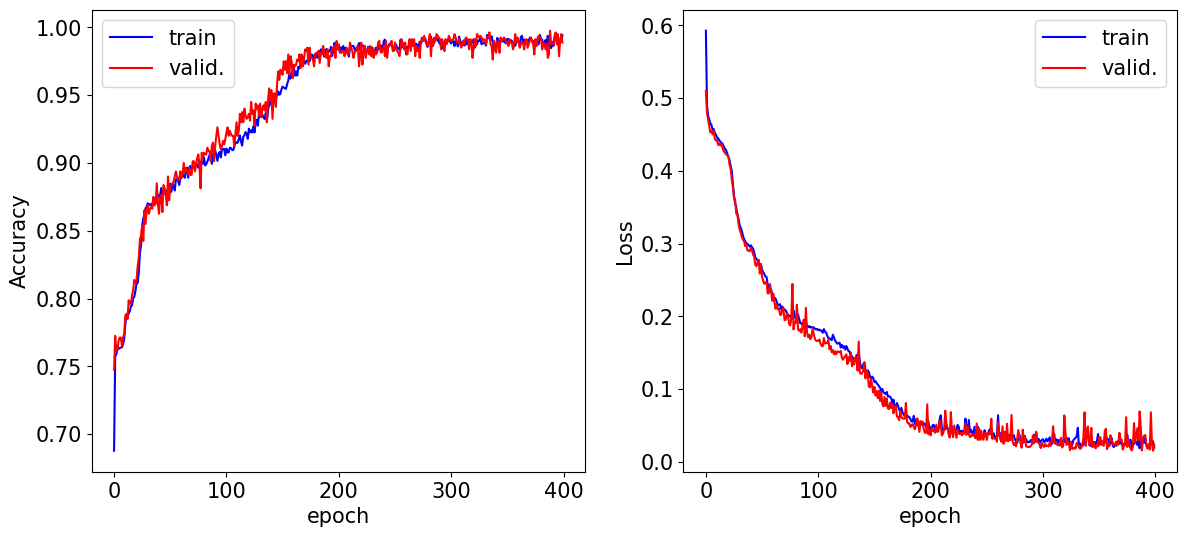

In [56]:
#plot loss and accuracy vs epoch number
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

Given the best DNN, we study how its performance changes when the number N of samples is reduced, augmented and increased.

## P 2.A Reduced data

We make a try considering the 50 % of the original data. The new reduced dataset is divided into train (80%) and validation set and  the data are rescaled.
The data are then trained using the best Neural Network from previous point and the resulting loss and accuracy are shown in the figures below.

In [57]:
Nr = 2000 #Nr is the nuber of data samples we consider for the reduced dataset
Nr_train = int(perc_train*Nr)
xr_train = x[0:Nr_train]
yr_train = y[0:Nr_train]
xr_valid = x[Nr_train:Nr]
yr_valid = y[Nr_train:Nr]

print("Train:",len(xr_train),"\t Validation:",len(xr_valid))

#rescale data
xr_train = Rescale(xr_train)
xr_valid = Rescale(xr_valid)

Train: 1600 	 Validation: 400


In [58]:
fit = best_model_DNN.fit(xr_train, yr_train,
               epochs = 400, batch_size = 50,
               validation_data=(xr_valid,yr_valid),    #fit with same amount of data
               verbose=2)

Epoch 1/400
32/32 - 0s - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0313 - val_accuracy: 0.9850 - 194ms/epoch - 6ms/step
Epoch 2/400
32/32 - 0s - loss: 0.0264 - accuracy: 0.9900 - val_loss: 0.0257 - val_accuracy: 0.9900 - 158ms/epoch - 5ms/step
Epoch 3/400
32/32 - 0s - loss: 0.0290 - accuracy: 0.9875 - val_loss: 0.0571 - val_accuracy: 0.9775 - 163ms/epoch - 5ms/step
Epoch 4/400
32/32 - 0s - loss: 0.0241 - accuracy: 0.9887 - val_loss: 0.0399 - val_accuracy: 0.9800 - 198ms/epoch - 6ms/step
Epoch 5/400
32/32 - 0s - loss: 0.0215 - accuracy: 0.9912 - val_loss: 0.0369 - val_accuracy: 0.9850 - 188ms/epoch - 6ms/step
Epoch 6/400
32/32 - 0s - loss: 0.0263 - accuracy: 0.9887 - val_loss: 0.0467 - val_accuracy: 0.9850 - 221ms/epoch - 7ms/step
Epoch 7/400
32/32 - 0s - loss: 0.0337 - accuracy: 0.9856 - val_loss: 0.0396 - val_accuracy: 0.9825 - 181ms/epoch - 6ms/step
Epoch 8/400
32/32 - 0s - loss: 0.0184 - accuracy: 0.9925 - val_loss: 0.0357 - val_accuracy: 0.9825 - 146ms/epoch - 5ms/step
Epoch 9/

Epoch 67/400
32/32 - 0s - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.0494 - val_accuracy: 0.9800 - 216ms/epoch - 7ms/step
Epoch 68/400
32/32 - 0s - loss: 0.0213 - accuracy: 0.9887 - val_loss: 0.0266 - val_accuracy: 0.9850 - 219ms/epoch - 7ms/step
Epoch 69/400
32/32 - 0s - loss: 0.0267 - accuracy: 0.9887 - val_loss: 0.0311 - val_accuracy: 0.9825 - 174ms/epoch - 5ms/step
Epoch 70/400
32/32 - 0s - loss: 0.0163 - accuracy: 0.9919 - val_loss: 0.0438 - val_accuracy: 0.9825 - 187ms/epoch - 6ms/step
Epoch 71/400
32/32 - 0s - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.0388 - val_accuracy: 0.9775 - 205ms/epoch - 6ms/step
Epoch 72/400
32/32 - 0s - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0517 - val_accuracy: 0.9825 - 141ms/epoch - 4ms/step
Epoch 73/400
32/32 - 0s - loss: 0.0221 - accuracy: 0.9906 - val_loss: 0.0202 - val_accuracy: 0.9950 - 172ms/epoch - 5ms/step
Epoch 74/400
32/32 - 0s - loss: 0.0196 - accuracy: 0.9912 - val_loss: 0.0385 - val_accuracy: 0.9825 - 157ms/epoch - 5ms/step


Epoch 133/400
32/32 - 0s - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0231 - val_accuracy: 0.9925 - 166ms/epoch - 5ms/step
Epoch 134/400
32/32 - 0s - loss: 0.0255 - accuracy: 0.9887 - val_loss: 0.0410 - val_accuracy: 0.9800 - 165ms/epoch - 5ms/step
Epoch 135/400
32/32 - 0s - loss: 0.0258 - accuracy: 0.9894 - val_loss: 0.0152 - val_accuracy: 0.9975 - 130ms/epoch - 4ms/step
Epoch 136/400
32/32 - 0s - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0237 - val_accuracy: 0.9900 - 138ms/epoch - 4ms/step
Epoch 137/400
32/32 - 0s - loss: 0.0247 - accuracy: 0.9906 - val_loss: 0.0480 - val_accuracy: 0.9800 - 151ms/epoch - 5ms/step
Epoch 138/400
32/32 - 0s - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0235 - val_accuracy: 0.9925 - 169ms/epoch - 5ms/step
Epoch 139/400
32/32 - 0s - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.0316 - val_accuracy: 0.9875 - 159ms/epoch - 5ms/step
Epoch 140/400
32/32 - 0s - loss: 0.0206 - accuracy: 0.9887 - val_loss: 0.0206 - val_accuracy: 0.9875 - 159ms/epoch - 5

32/32 - 0s - loss: 0.0328 - accuracy: 0.9881 - val_loss: 0.0266 - val_accuracy: 0.9850 - 175ms/epoch - 5ms/step
Epoch 199/400
32/32 - 0s - loss: 0.0477 - accuracy: 0.9875 - val_loss: 0.0249 - val_accuracy: 0.9925 - 199ms/epoch - 6ms/step
Epoch 200/400
32/32 - 0s - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0227 - val_accuracy: 0.9925 - 144ms/epoch - 5ms/step
Epoch 201/400
32/32 - 0s - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0227 - val_accuracy: 0.9925 - 141ms/epoch - 4ms/step
Epoch 202/400
32/32 - 0s - loss: 0.0251 - accuracy: 0.9894 - val_loss: 0.0208 - val_accuracy: 0.9900 - 166ms/epoch - 5ms/step
Epoch 203/400
32/32 - 0s - loss: 0.0195 - accuracy: 0.9925 - val_loss: 0.0635 - val_accuracy: 0.9775 - 153ms/epoch - 5ms/step
Epoch 204/400
32/32 - 0s - loss: 0.0290 - accuracy: 0.9887 - val_loss: 0.0203 - val_accuracy: 0.9875 - 127ms/epoch - 4ms/step
Epoch 205/400
32/32 - 0s - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0272 - val_accuracy: 0.9900 - 138ms/epoch - 4ms/step
Epoch 

Epoch 264/400
32/32 - 0s - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.0287 - val_accuracy: 0.9875 - 142ms/epoch - 4ms/step
Epoch 265/400
32/32 - 0s - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0182 - val_accuracy: 0.9925 - 138ms/epoch - 4ms/step
Epoch 266/400
32/32 - 0s - loss: 0.0129 - accuracy: 0.9975 - val_loss: 0.0271 - val_accuracy: 0.9900 - 158ms/epoch - 5ms/step
Epoch 267/400
32/32 - 0s - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0262 - val_accuracy: 0.9900 - 174ms/epoch - 5ms/step
Epoch 268/400
32/32 - 0s - loss: 0.0379 - accuracy: 0.9850 - val_loss: 0.0419 - val_accuracy: 0.9825 - 149ms/epoch - 5ms/step
Epoch 269/400
32/32 - 0s - loss: 0.0235 - accuracy: 0.9906 - val_loss: 0.0291 - val_accuracy: 0.9875 - 164ms/epoch - 5ms/step
Epoch 270/400
32/32 - 0s - loss: 0.0231 - accuracy: 0.9912 - val_loss: 0.0405 - val_accuracy: 0.9800 - 173ms/epoch - 5ms/step
Epoch 271/400
32/32 - 0s - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0178 - val_accuracy: 0.9900 - 167ms/epoch - 5

32/32 - 0s - loss: 0.0193 - accuracy: 0.9925 - val_loss: 0.0451 - val_accuracy: 0.9825 - 176ms/epoch - 5ms/step
Epoch 330/400
32/32 - 0s - loss: 0.0157 - accuracy: 0.9944 - val_loss: 0.0167 - val_accuracy: 0.9925 - 196ms/epoch - 6ms/step
Epoch 331/400
32/32 - 0s - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0245 - val_accuracy: 0.9925 - 245ms/epoch - 8ms/step
Epoch 332/400
32/32 - 0s - loss: 0.0236 - accuracy: 0.9912 - val_loss: 0.0248 - val_accuracy: 0.9875 - 166ms/epoch - 5ms/step
Epoch 333/400
32/32 - 0s - loss: 0.0235 - accuracy: 0.9894 - val_loss: 0.0448 - val_accuracy: 0.9850 - 164ms/epoch - 5ms/step
Epoch 334/400
32/32 - 0s - loss: 0.0344 - accuracy: 0.9862 - val_loss: 0.0644 - val_accuracy: 0.9750 - 184ms/epoch - 6ms/step
Epoch 335/400
32/32 - 0s - loss: 0.0263 - accuracy: 0.9887 - val_loss: 0.0260 - val_accuracy: 0.9925 - 151ms/epoch - 5ms/step
Epoch 336/400
32/32 - 0s - loss: 0.0182 - accuracy: 0.9919 - val_loss: 0.0369 - val_accuracy: 0.9825 - 146ms/epoch - 5ms/step
Epoch 

Epoch 395/400
32/32 - 0s - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.0227 - val_accuracy: 0.9900 - 144ms/epoch - 5ms/step
Epoch 396/400
32/32 - 0s - loss: 0.0158 - accuracy: 0.9937 - val_loss: 0.0213 - val_accuracy: 0.9900 - 147ms/epoch - 5ms/step
Epoch 397/400
32/32 - 0s - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0201 - val_accuracy: 0.9900 - 154ms/epoch - 5ms/step
Epoch 398/400
32/32 - 0s - loss: 0.0168 - accuracy: 0.9931 - val_loss: 0.0219 - val_accuracy: 0.9925 - 151ms/epoch - 5ms/step
Epoch 399/400
32/32 - 0s - loss: 0.0157 - accuracy: 0.9944 - val_loss: 0.0447 - val_accuracy: 0.9800 - 157ms/epoch - 5ms/step
Epoch 400/400
32/32 - 0s - loss: 0.0206 - accuracy: 0.9906 - val_loss: 0.0176 - val_accuracy: 0.9950 - 134ms/epoch - 4ms/step


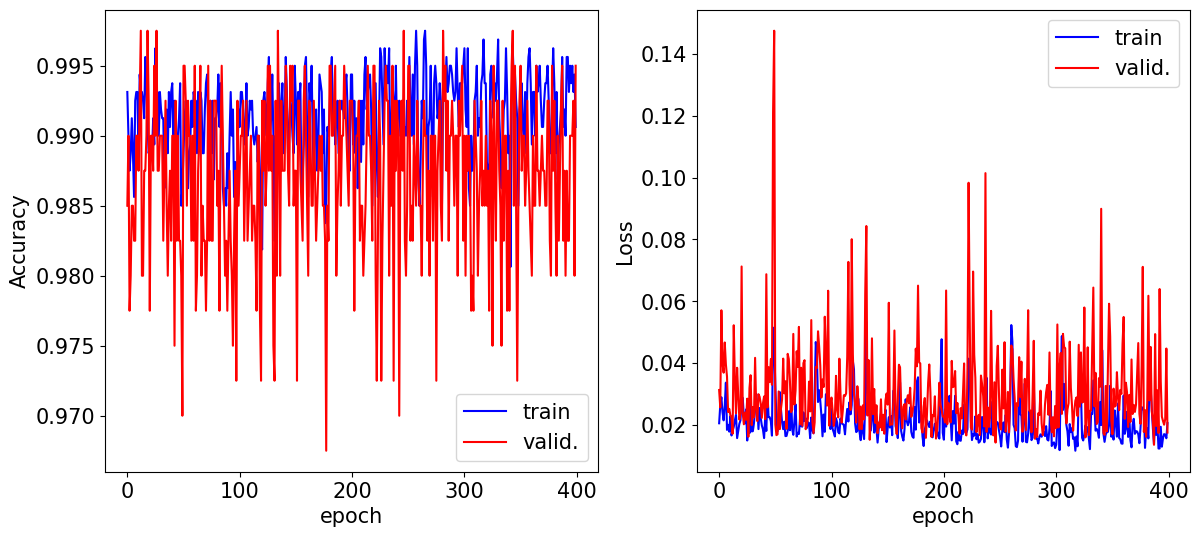

In [59]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

As we can see a drastic reduction of data to train lead to the underfitting scenario, which means that our data model is unable to interpret the correlation between input and output variables. As we can see both training and validation loss are quite bad.

In [66]:
Nr = 3000 #Nr is the nuber of data samples we consider for the reduced dataset
Nr_train = int(perc_train*Nr)
xr_train = x[0:Nr_train]
yr_train = y[0:Nr_train]
xr_valid = x[Nr_train:Nr]
yr_valid = y[Nr_train:Nr]

print("Train:",len(xr_train),"\t Validation:",len(xr_valid))

#rescale data
xr_train = Rescale(xr_train)
xr_valid = Rescale(xr_valid)

fit = best_model_DNN.fit(xr_train, yr_train,
               epochs = 80, batch_size = 100,
               validation_data=(xr_valid,yr_valid),    #fit with same amount of data
               verbose=2)

Train: 2400 	 Validation: 600
Epoch 1/80
24/24 - 0s - loss: 0.0195 - accuracy: 0.9921 - val_loss: 0.0216 - val_accuracy: 0.9900 - 180ms/epoch - 8ms/step
Epoch 2/80
24/24 - 0s - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0172 - val_accuracy: 0.9933 - 191ms/epoch - 8ms/step
Epoch 3/80
24/24 - 0s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0178 - val_accuracy: 0.9917 - 154ms/epoch - 6ms/step
Epoch 4/80
24/24 - 0s - loss: 0.0103 - accuracy: 0.9979 - val_loss: 0.0155 - val_accuracy: 0.9950 - 172ms/epoch - 7ms/step
Epoch 5/80
24/24 - 0s - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0175 - val_accuracy: 0.9917 - 176ms/epoch - 7ms/step
Epoch 6/80
24/24 - 0s - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0159 - val_accuracy: 0.9917 - 172ms/epoch - 7ms/step
Epoch 7/80
24/24 - 0s - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0173 - val_accuracy: 0.9933 - 166ms/epoch - 7ms/step
Epoch 8/80
24/24 - 0s - loss: 0.0096 - accuracy: 0.9979 - val_loss: 0.0154 - val_accuracy: 0.9950 - 154ms/epo

Epoch 67/80
24/24 - 0s - loss: 0.0101 - accuracy: 0.9946 - val_loss: 0.0228 - val_accuracy: 0.9933 - 143ms/epoch - 6ms/step
Epoch 68/80
24/24 - 0s - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0155 - val_accuracy: 0.9950 - 233ms/epoch - 10ms/step
Epoch 69/80
24/24 - 0s - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0228 - val_accuracy: 0.9917 - 146ms/epoch - 6ms/step
Epoch 70/80
24/24 - 0s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0341 - val_accuracy: 0.9867 - 213ms/epoch - 9ms/step
Epoch 71/80
24/24 - 0s - loss: 0.0131 - accuracy: 0.9942 - val_loss: 0.0178 - val_accuracy: 0.9917 - 192ms/epoch - 8ms/step
Epoch 72/80
24/24 - 0s - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0177 - val_accuracy: 0.9950 - 154ms/epoch - 6ms/step
Epoch 73/80
24/24 - 0s - loss: 0.0184 - accuracy: 0.9925 - val_loss: 0.0180 - val_accuracy: 0.9933 - 160ms/epoch - 7ms/step
Epoch 74/80
24/24 - 0s - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0246 - val_accuracy: 0.9917 - 151ms/epoch - 6ms/step
Epoch 7

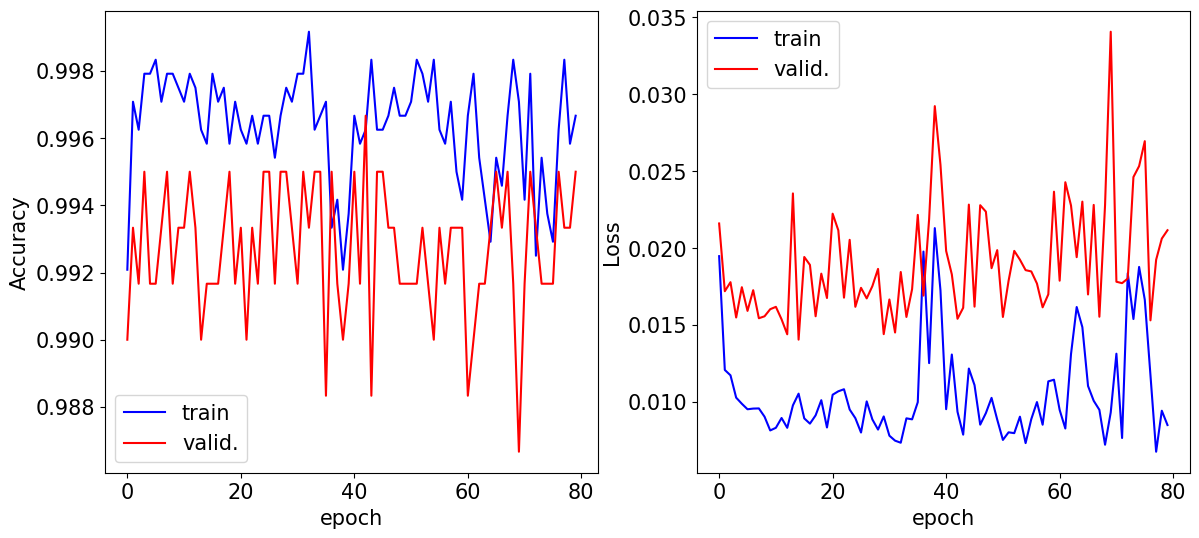

In [67]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## P 2.C Data incrementation

In the following code the data incremetation tecnique is applied to the previous dataset. The new dataset's variables are indicated with capital letters 'X' for the features and 'Y' for the labels. In particular N=10000 points were generated and preprocessed. We then trained the model using the best parameters previously founded using grid search methods.

<function matplotlib.pyplot.show(close=None, block=None)>

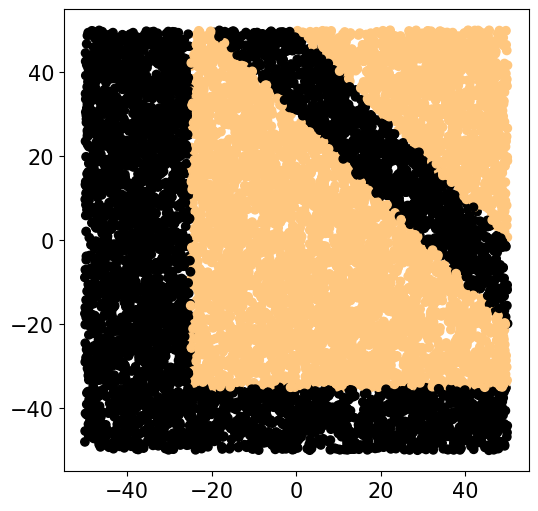

In [85]:
#importing the incremented data
TYPE=1
X = np.loadtxt(filename("data_incremented",TYPE), delimiter=' ')
Y = np.loadtxt(filename("labels_incremented",TYPE), delimiter=' ')
plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show

In [86]:
#divide the data into training and validation
N = len(X)
N_incr_train = int(perc_train * N)
X_train = X[0:N_incr_train]
Y_train = Y[0:N_incr_train]
X_valid = X[N_incr_train:N]
Y_valid = Y[N_incr_train:N]

print("Train:",len(X_train),"\t Validation:",len(X_valid))

#rescale the data
X_train = Rescale(X_train)
X_valid = Rescale(X_valid)

Train: 8000 	 Validation: 2000


In [87]:
#best model from previous point
def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           
                  metrics=['accuracy'])
    return model

best_model_DNN = create_model()

#train the model (the model is the best model founded in point 1)
fit = best_model_DNN.fit(X_train, Y_train,
               epochs = 400, batch_size = 50,
               validation_data=(X_valid,Y_valid),   
               verbose=2)

Epoch 1/400
160/160 - 1s - loss: 0.6305 - accuracy: 0.6668 - val_loss: 0.5937 - val_accuracy: 0.7345 - 1s/epoch - 8ms/step
Epoch 2/400
160/160 - 1s - loss: 0.5552 - accuracy: 0.7424 - val_loss: 0.5271 - val_accuracy: 0.7495 - 645ms/epoch - 4ms/step
Epoch 3/400
160/160 - 1s - loss: 0.5137 - accuracy: 0.7584 - val_loss: 0.4967 - val_accuracy: 0.7535 - 678ms/epoch - 4ms/step
Epoch 4/400
160/160 - 1s - loss: 0.4912 - accuracy: 0.7688 - val_loss: 0.4783 - val_accuracy: 0.7650 - 700ms/epoch - 4ms/step
Epoch 5/400
160/160 - 1s - loss: 0.4751 - accuracy: 0.7722 - val_loss: 0.4599 - val_accuracy: 0.7725 - 675ms/epoch - 4ms/step
Epoch 6/400
160/160 - 1s - loss: 0.4560 - accuracy: 0.7739 - val_loss: 0.4426 - val_accuracy: 0.7650 - 640ms/epoch - 4ms/step
Epoch 7/400
160/160 - 1s - loss: 0.4371 - accuracy: 0.7764 - val_loss: 0.4215 - val_accuracy: 0.7760 - 650ms/epoch - 4ms/step
Epoch 8/400
160/160 - 1s - loss: 0.4254 - accuracy: 0.7786 - val_loss: 0.4113 - val_accuracy: 0.7780 - 725ms/epoch - 5ms/

Epoch 66/400
160/160 - 1s - loss: 0.0627 - accuracy: 0.9830 - val_loss: 0.0454 - val_accuracy: 0.9900 - 567ms/epoch - 4ms/step
Epoch 67/400
160/160 - 1s - loss: 0.0555 - accuracy: 0.9849 - val_loss: 0.0387 - val_accuracy: 0.9880 - 709ms/epoch - 4ms/step
Epoch 68/400
160/160 - 1s - loss: 0.0614 - accuracy: 0.9835 - val_loss: 0.0378 - val_accuracy: 0.9930 - 677ms/epoch - 4ms/step
Epoch 69/400
160/160 - 1s - loss: 0.0544 - accuracy: 0.9876 - val_loss: 0.0364 - val_accuracy: 0.9910 - 615ms/epoch - 4ms/step
Epoch 70/400
160/160 - 1s - loss: 0.0645 - accuracy: 0.9839 - val_loss: 0.0390 - val_accuracy: 0.9910 - 598ms/epoch - 4ms/step
Epoch 71/400
160/160 - 1s - loss: 0.0631 - accuracy: 0.9851 - val_loss: 0.0406 - val_accuracy: 0.9865 - 848ms/epoch - 5ms/step
Epoch 72/400
160/160 - 1s - loss: 0.0515 - accuracy: 0.9875 - val_loss: 0.0354 - val_accuracy: 0.9910 - 640ms/epoch - 4ms/step
Epoch 73/400
160/160 - 1s - loss: 0.0505 - accuracy: 0.9884 - val_loss: 0.0345 - val_accuracy: 0.9930 - 582ms/e

Epoch 131/400
160/160 - 1s - loss: 0.0416 - accuracy: 0.9887 - val_loss: 0.0264 - val_accuracy: 0.9960 - 627ms/epoch - 4ms/step
Epoch 132/400
160/160 - 1s - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0599 - val_accuracy: 0.9835 - 618ms/epoch - 4ms/step
Epoch 133/400
160/160 - 1s - loss: 0.0441 - accuracy: 0.9880 - val_loss: 0.0378 - val_accuracy: 0.9855 - 777ms/epoch - 5ms/step
Epoch 134/400
160/160 - 1s - loss: 0.0513 - accuracy: 0.9856 - val_loss: 0.0339 - val_accuracy: 0.9875 - 703ms/epoch - 4ms/step
Epoch 135/400
160/160 - 1s - loss: 0.0432 - accuracy: 0.9874 - val_loss: 0.0259 - val_accuracy: 0.9935 - 652ms/epoch - 4ms/step
Epoch 136/400
160/160 - 1s - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0272 - val_accuracy: 0.9935 - 601ms/epoch - 4ms/step
Epoch 137/400
160/160 - 1s - loss: 0.0421 - accuracy: 0.9905 - val_loss: 0.0286 - val_accuracy: 0.9885 - 596ms/epoch - 4ms/step
Epoch 138/400
160/160 - 1s - loss: 0.0457 - accuracy: 0.9885 - val_loss: 0.0281 - val_accuracy: 0.9920 -

160/160 - 1s - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0196 - val_accuracy: 0.9960 - 646ms/epoch - 4ms/step
Epoch 196/400
160/160 - 1s - loss: 0.0353 - accuracy: 0.9909 - val_loss: 0.0249 - val_accuracy: 0.9925 - 679ms/epoch - 4ms/step
Epoch 197/400
160/160 - 1s - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.0199 - val_accuracy: 0.9965 - 588ms/epoch - 4ms/step
Epoch 198/400
160/160 - 1s - loss: 0.0384 - accuracy: 0.9899 - val_loss: 0.0221 - val_accuracy: 0.9940 - 657ms/epoch - 4ms/step
Epoch 199/400
160/160 - 1s - loss: 0.0322 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9895 - 652ms/epoch - 4ms/step
Epoch 200/400
160/160 - 1s - loss: 0.0310 - accuracy: 0.9923 - val_loss: 0.0210 - val_accuracy: 0.9950 - 697ms/epoch - 4ms/step
Epoch 201/400
160/160 - 1s - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0352 - val_accuracy: 0.9825 - 699ms/epoch - 4ms/step
Epoch 202/400
160/160 - 1s - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0257 - val_accuracy: 0.9910 - 773ms/epoch -

Epoch 260/400
160/160 - 1s - loss: 0.0284 - accuracy: 0.9891 - val_loss: 0.0156 - val_accuracy: 0.9945 - 660ms/epoch - 4ms/step
Epoch 261/400
160/160 - 1s - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.0191 - val_accuracy: 0.9950 - 617ms/epoch - 4ms/step
Epoch 262/400
160/160 - 1s - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0187 - val_accuracy: 0.9935 - 675ms/epoch - 4ms/step
Epoch 263/400
160/160 - 1s - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0168 - val_accuracy: 0.9950 - 601ms/epoch - 4ms/step
Epoch 264/400
160/160 - 1s - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0184 - val_accuracy: 0.9945 - 669ms/epoch - 4ms/step
Epoch 265/400
160/160 - 1s - loss: 0.0306 - accuracy: 0.9879 - val_loss: 0.0157 - val_accuracy: 0.9970 - 579ms/epoch - 4ms/step
Epoch 266/400
160/160 - 1s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0244 - val_accuracy: 0.9900 - 658ms/epoch - 4ms/step
Epoch 267/400
160/160 - 1s - loss: 0.0291 - accuracy: 0.9887 - val_loss: 0.0182 - val_accuracy: 0.9945 -

160/160 - 1s - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0154 - val_accuracy: 0.9945 - 598ms/epoch - 4ms/step
Epoch 325/400
160/160 - 1s - loss: 0.0235 - accuracy: 0.9910 - val_loss: 0.0176 - val_accuracy: 0.9925 - 733ms/epoch - 5ms/step
Epoch 326/400
160/160 - 1s - loss: 0.0271 - accuracy: 0.9894 - val_loss: 0.0150 - val_accuracy: 0.9950 - 608ms/epoch - 4ms/step
Epoch 327/400
160/160 - 1s - loss: 0.0241 - accuracy: 0.9912 - val_loss: 0.0208 - val_accuracy: 0.9925 - 658ms/epoch - 4ms/step
Epoch 328/400
160/160 - 1s - loss: 0.0316 - accuracy: 0.9887 - val_loss: 0.0337 - val_accuracy: 0.9860 - 728ms/epoch - 5ms/step
Epoch 329/400
160/160 - 1s - loss: 0.0380 - accuracy: 0.9860 - val_loss: 0.0231 - val_accuracy: 0.9915 - 634ms/epoch - 4ms/step
Epoch 330/400
160/160 - 1s - loss: 0.0242 - accuracy: 0.9890 - val_loss: 0.0172 - val_accuracy: 0.9960 - 584ms/epoch - 4ms/step
Epoch 331/400
160/160 - 1s - loss: 0.0265 - accuracy: 0.9899 - val_loss: 0.0199 - val_accuracy: 0.9910 - 585ms/epoch -

Epoch 389/400
160/160 - 1s - loss: 0.0301 - accuracy: 0.9876 - val_loss: 0.0156 - val_accuracy: 0.9940 - 703ms/epoch - 4ms/step
Epoch 390/400
160/160 - 1s - loss: 0.0258 - accuracy: 0.9898 - val_loss: 0.0201 - val_accuracy: 0.9930 - 716ms/epoch - 4ms/step
Epoch 391/400
160/160 - 1s - loss: 0.0251 - accuracy: 0.9887 - val_loss: 0.0163 - val_accuracy: 0.9955 - 579ms/epoch - 4ms/step
Epoch 392/400
160/160 - 1s - loss: 0.0285 - accuracy: 0.9881 - val_loss: 0.0255 - val_accuracy: 0.9900 - 684ms/epoch - 4ms/step
Epoch 393/400
160/160 - 1s - loss: 0.0243 - accuracy: 0.9908 - val_loss: 0.0271 - val_accuracy: 0.9890 - 693ms/epoch - 4ms/step
Epoch 394/400
160/160 - 1s - loss: 0.0241 - accuracy: 0.9910 - val_loss: 0.0248 - val_accuracy: 0.9875 - 565ms/epoch - 4ms/step
Epoch 395/400
160/160 - 1s - loss: 0.0261 - accuracy: 0.9896 - val_loss: 0.0194 - val_accuracy: 0.9950 - 689ms/epoch - 4ms/step
Epoch 396/400
160/160 - 1s - loss: 0.0262 - accuracy: 0.9898 - val_loss: 0.0256 - val_accuracy: 0.9900 -

Max accuracy up to 40 epochs: 0.9955000281333923
Min loss up to 40 epochs: 0.057483941316604614


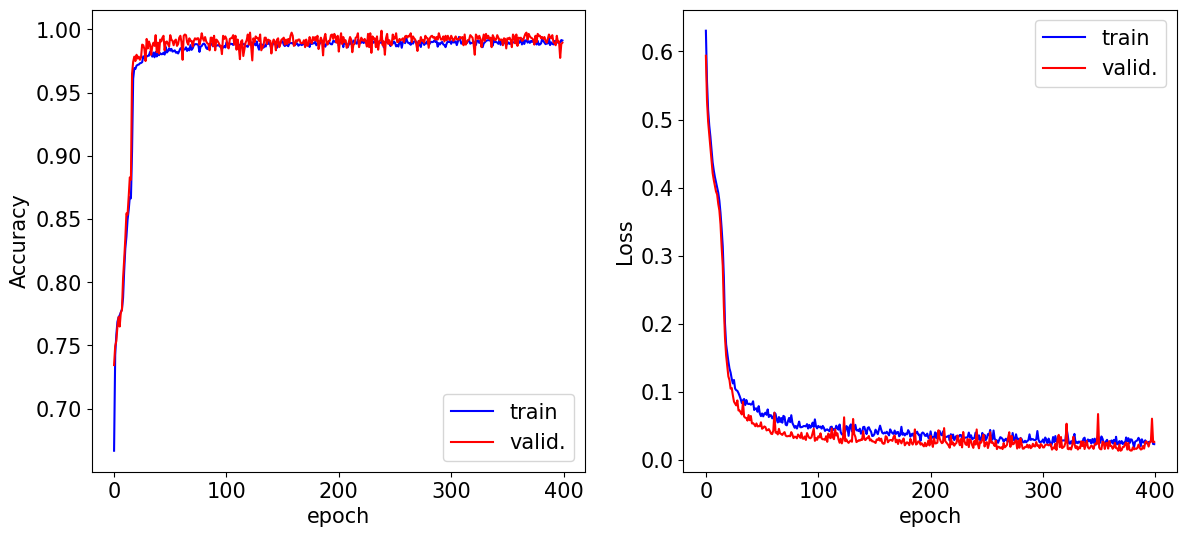

In [93]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## P 2.C Data augmentation